In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt 

In [2]:
import pmdarima as pm

In [3]:
def calculate_smape(actual, predicted) -> float: 
  
    # Convert actual and predicted to numpy 
    # array data type if not already 
    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2) ) , 2
    ) 

tutorial : https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6

Reading the pickle file with the object that has the normalized data and the scalers.

In [4]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()

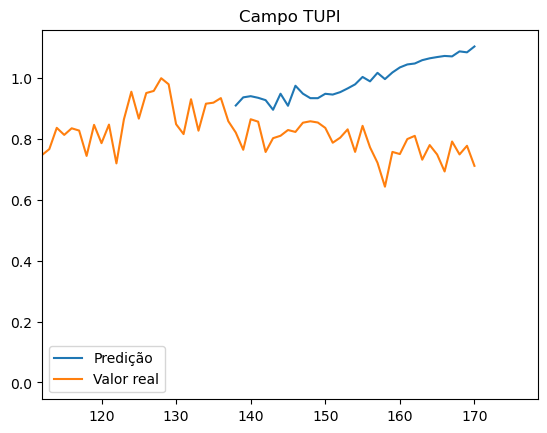

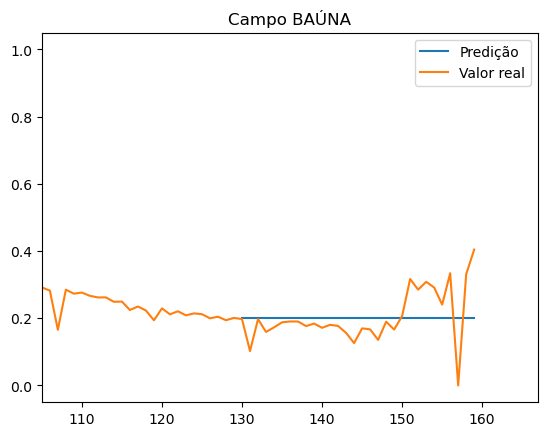

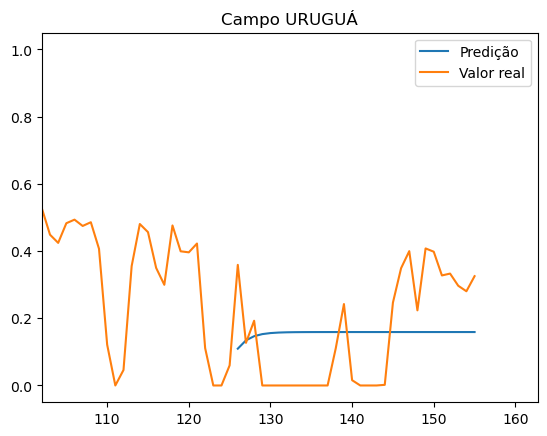

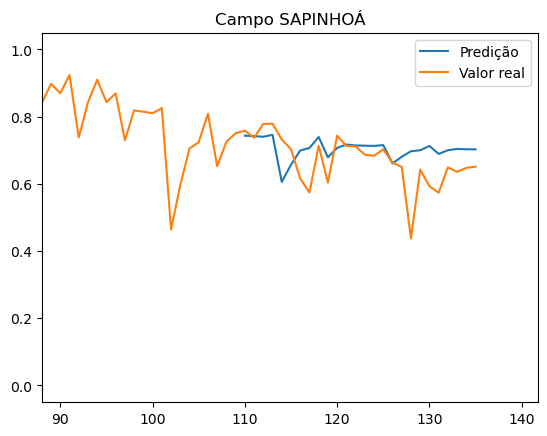

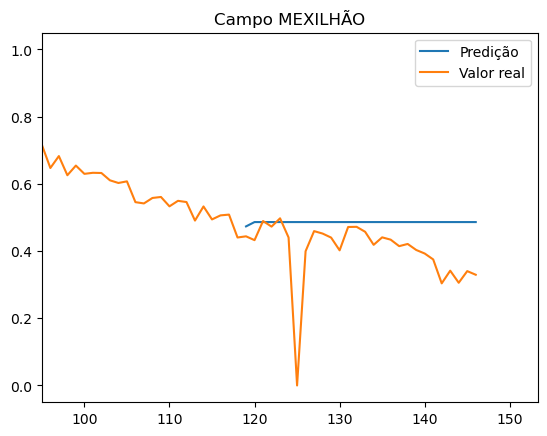

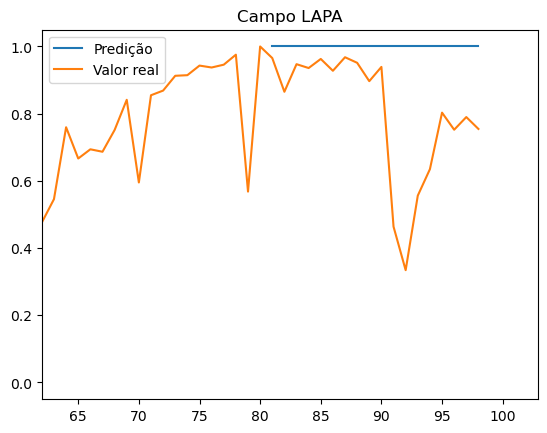

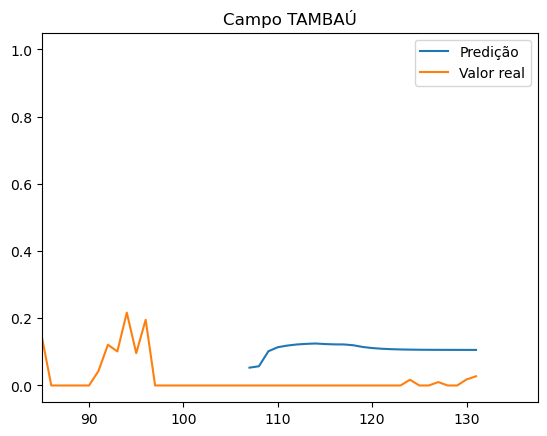

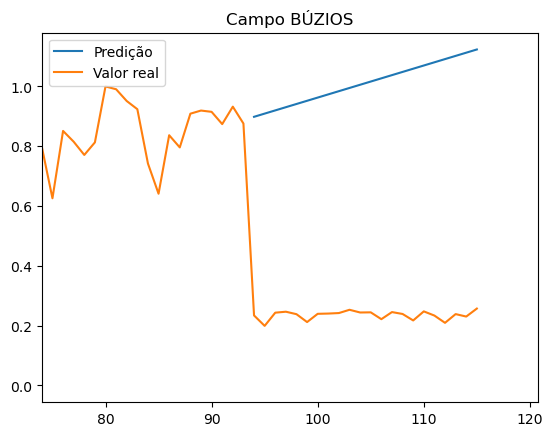

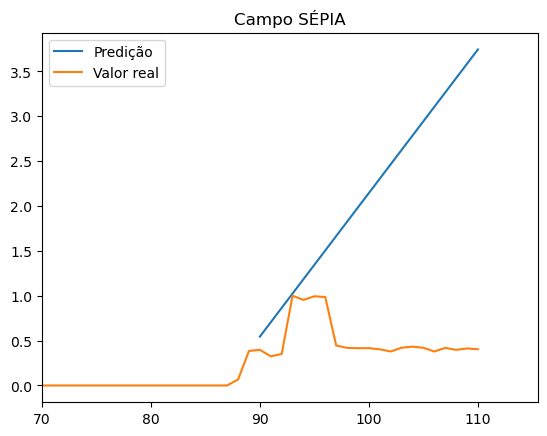

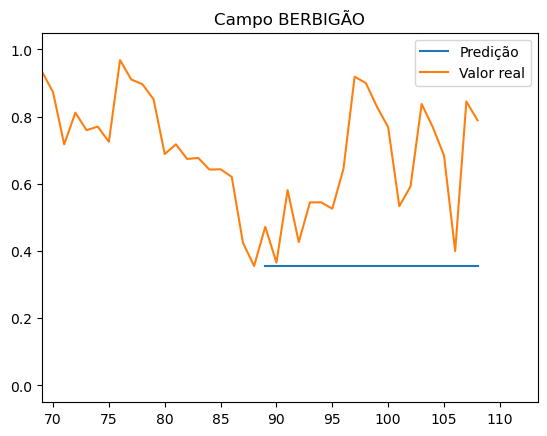

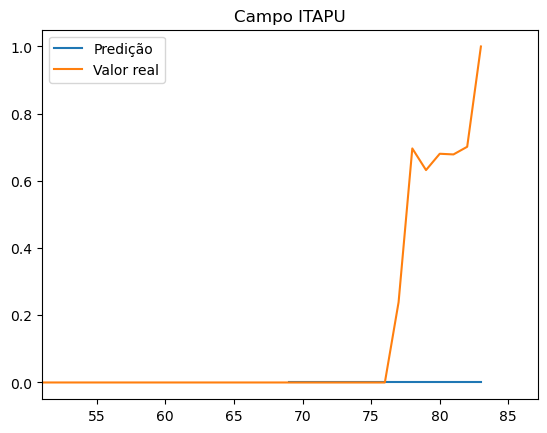

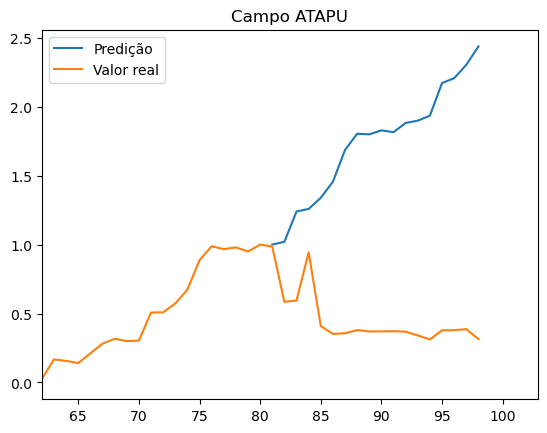

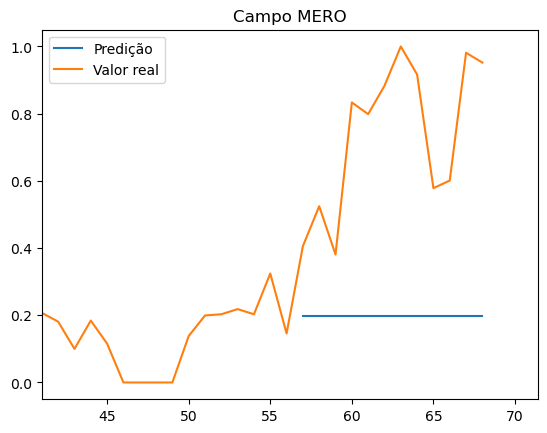

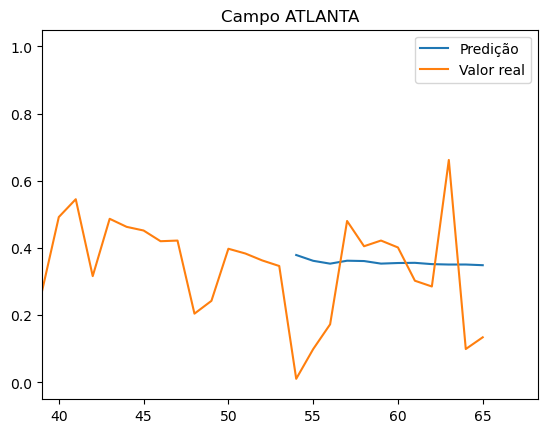

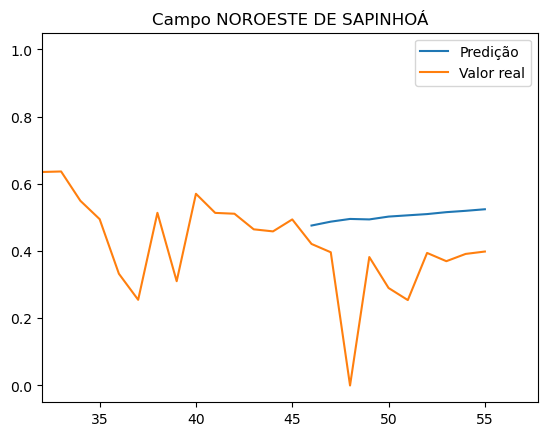

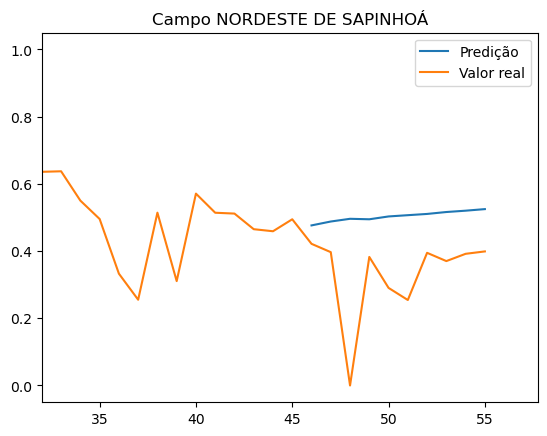

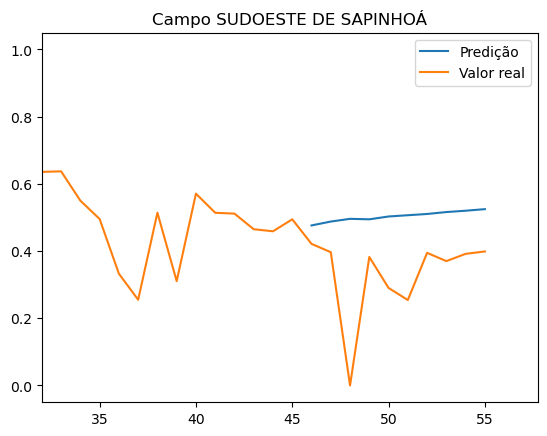

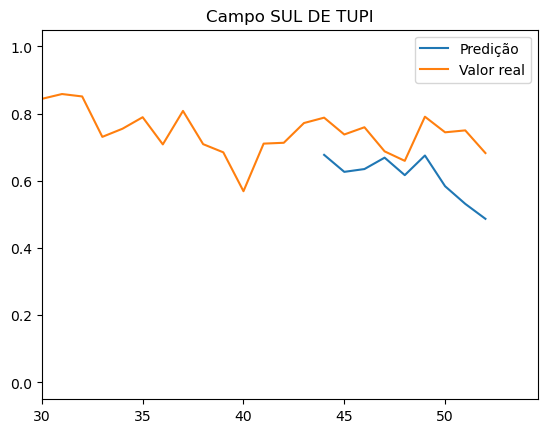

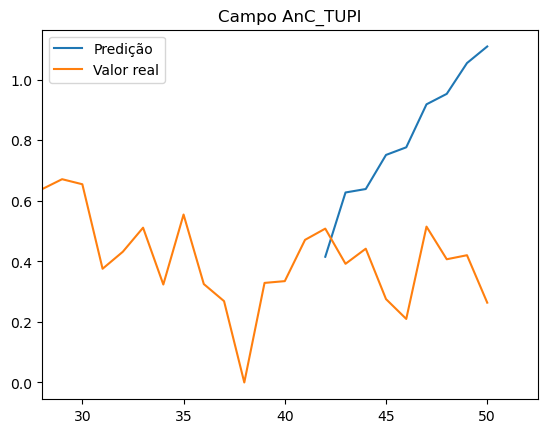

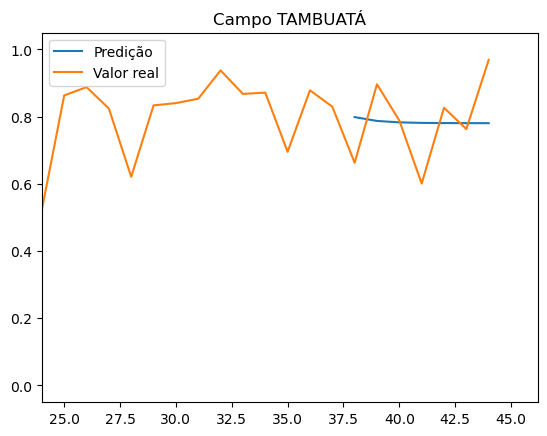

In [23]:
#Standard ARIMA Model
resultados = {
    'campo':[] ,
    'idx_treino':[] ,
    'idx_teste': [] ,
    'preds': [] ,
    'y_test':[] ,
    'modelo': []
}


for campo in pipe.keys():
    #campo = 'TUPI'
    #X_treino = pipe[campo][0][10:,:-1]
    y_treino = pipe[campo][0][10:,-1]

    idx_train = range(0,int(y_treino.shape[0] * 0.8))
    idx_test = range( int(y_treino.shape[0] * 0.8) , y_treino.shape[0])

    y_train = y_treino[idx_train]
    y_test = y_treino[idx_test]

    ARIMA_model = pm.auto_arima( y_train , 
                          start_p=1, 
                          start_q=1,
                          test='adf', # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                          d=None,# let model determine 'd'
                          seasonal=True, # No Seasonality for standard ARIMA
                          trace=False, #logs 
                          error_action='warn', #shows errors ('ignore' silences these)
                          suppress_warnings=True,
                          stepwise=True)

    y_pred = ARIMA_model.predict(len(idx_test))

    #Plot of real values and forecasting
    plt.plot(np.array(idx_test)+10, y_pred, label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(y_treino.shape[0] * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['idx_treino'].append(idx_train)
    resultados['idx_teste'].append( idx_test)
    resultados['preds'].append( y_pred.reshape(-1) )
    resultados['y_test'].append( y_test.reshape(-1) )
    resultados['modelo'].append( ARIMA_model )

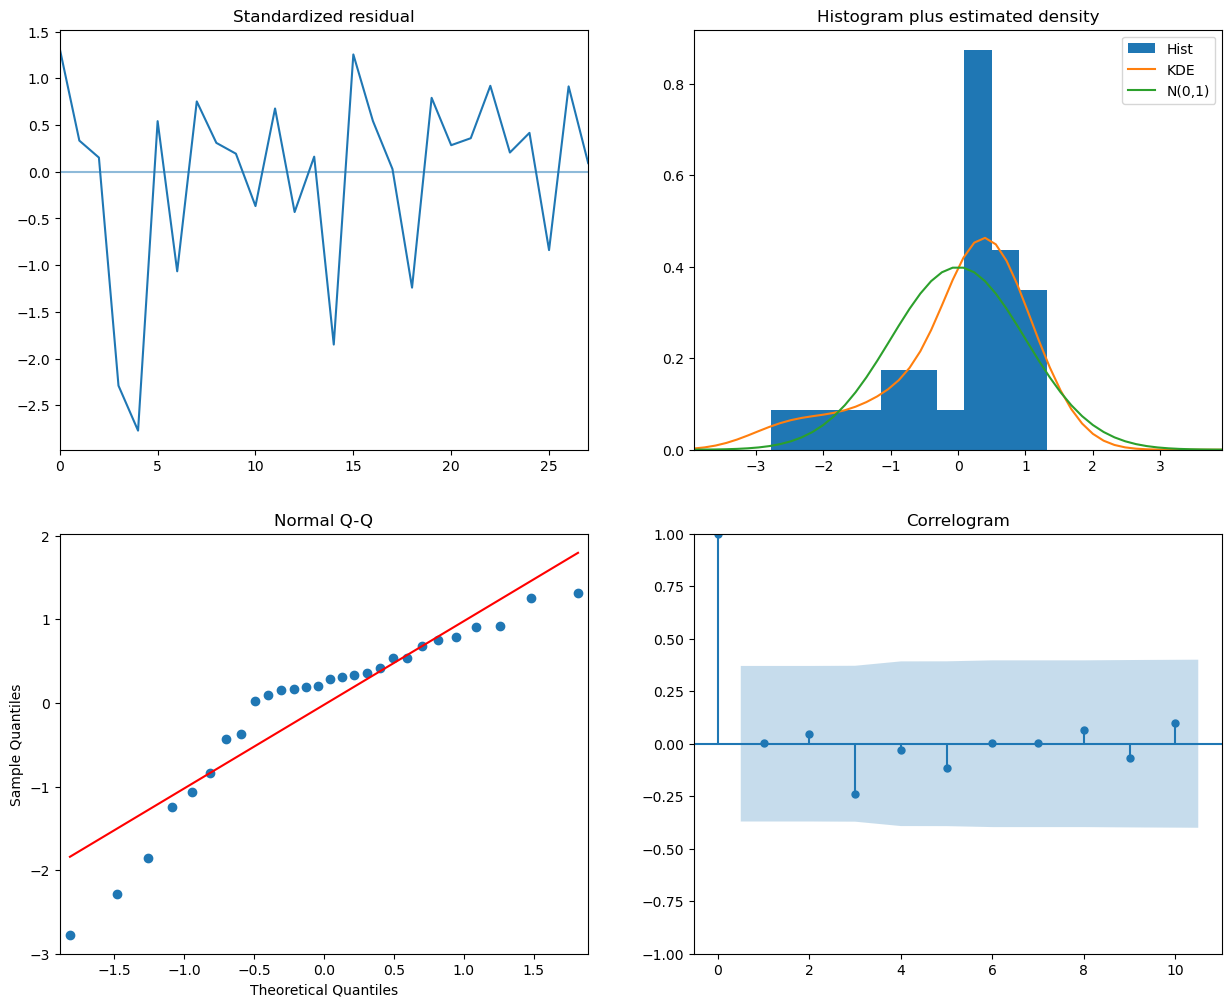

In [24]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [25]:
resultados_arima=pd.DataFrame(resultados)

In [26]:
resultados_arima

,campo,idx_treino,idx_teste,preds,y_test,modelo
0,TUPI,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(128, 129, 130, 131, 132, 133, 134, 135, 136, ...","[0.9103021354615561, 0.9370756643711387, 0.940...","[0.8214066534253689, 0.7647913774854848, 0.865...","ARIMA(0,1,1)(1,0,1)[12] intercept"
1,BAÚNA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","[0.2011099387982297, 0.2011099387982297, 0.201...","[0.1975508185171136, 0.10235965707566395, 0.19...","ARIMA(0,1,0)(0,0,0)[12]"
2,URUGUÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(116, 117, 118, 119, 120, 121, 122, 123, 124, ...","[0.10951538087241483, 0.13429924874358362, 0.1...","[0.3589638811011853, 0.12684957803800515, 0.19...","ARIMA(1,1,1)(0,0,0)[12]"
3,SAPINHOÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(100, 101, 102, 103, 104, 105, 106, 107, 108, ...","[0.7434972890467813, 0.7420073776334325, 0.740...","[0.7584455110898232, 0.7374497783545088, 0.778...","ARIMA(0,1,1)(1,0,0)[12]"
4,MEXILHÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(109, 110, 111, 112, 113, 114, 115, 116, 117, ...","[0.47345873402773436, 0.48633584979479605, 0.4...","[0.44390206904052504, 0.432519340906554, 0.489...","ARIMA(0,1,2)(0,0,0)[12]"
5,LAPA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9655466459597909, 0.8651958259139064, 0.947...","ARIMA(0,1,0)(0,0,0)[12]"
6,TAMBAÚ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(97, 98, 99, 100, 101, 102, 103, 104, 105, 106...","[0.05307745001207373, 0.05722457582877639, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","ARIMA(1,0,0)(0,0,1)[12] intercept"
7,BÚZIOS,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...","[0.8984418372987096, 0.9091635762206994, 0.919...","[0.23425834000279713, 0.19933104240630184, 0.2...","ARIMA(0,1,1)(0,0,0)[12] intercept"
8,SÉPIA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9...","[0.5447362451995432, 0.7046972584446489, 0.864...","[0.39721008887005116, 0.3247225642260197, 0.35...","ARIMA(0,2,1)(0,0,0)[12]"
9,BERBIGÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9...","[0.35557297838434193, 0.35557297838434193, 0.3...","[0.4721462905503638, 0.3657926517014161, 0.581...","ARIMA(0,1,0)(0,0,0)[12]"


In [27]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i][0])
    predicted = np.append(predicted, resultados['preds'][i][0])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.19744264180667262
MAE: 0.12493100772852572
MSE: 0.038983596803598024


In [29]:
resultados_arima['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_arima.iterrows()]
resultados_arima['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_arima.iterrows()]
resultados_arima['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_arima.iterrows()]

resultados_arima['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_arima.iterrows()]
resultados_arima['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_arima.iterrows()]
resultados_arima['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_arima.iterrows()]

In [30]:
resultados_arima

,campo,idx_treino,idx_teste,preds,y_test,modelo,mse,rmse,mae,mse_1,rmse_1,mae_1
0,TUPI,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(128, 129, 130, 131, 132, 133, 134, 135, 136, ...","[0.9103021354615561, 0.9370756643711387, 0.940...","[0.8214066534253689, 0.7647913774854848, 0.865...","ARIMA(0,1,1)(1,0,1)[12] intercept",0.051864,0.227737,0.204903,0.007902,0.088895,0.088895
1,BAÚNA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","[0.2011099387982297, 0.2011099387982297, 0.201...","[0.1975508185171136, 0.10235965707566395, 0.19...","ARIMA(0,1,0)(0,0,0)[12]",0.006302,0.079384,0.057747,0.000013,0.003559,0.003559
2,URUGUÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(116, 117, 118, 119, 120, 121, 122, 123, 124, ...","[0.10951538087241483, 0.13429924874358362, 0.1...","[0.3589638811011853, 0.12684957803800515, 0.19...","ARIMA(1,1,1)(0,0,0)[12]",0.025450,0.159531,0.148984,0.062225,0.249449,0.249449
3,SAPINHOÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(100, 101, 102, 103, 104, 105, 106, 107, 108, ...","[0.7434972890467813, 0.7420073776334325, 0.740...","[0.7584455110898232, 0.7374497783545088, 0.778...","ARIMA(0,1,1)(1,0,0)[12]",0.006421,0.080134,0.057822,0.000223,0.014948,0.014948
4,MEXILHÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(109, 110, 111, 112, 113, 114, 115, 116, 117, ...","[0.47345873402773436, 0.48633584979479605, 0.4...","[0.44390206904052504, 0.432519340906554, 0.489...","ARIMA(0,1,2)(0,0,0)[12]",0.015791,0.125661,0.085004,0.000874,0.029557,0.029557
5,LAPA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9655466459597909, 0.8651958259139064, 0.947...","ARIMA(0,1,0)(0,0,0)[12]",0.073130,0.270426,0.197307,0.001187,0.034453,0.034453
6,TAMBAÚ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(97, 98, 99, 100, 101, 102, 103, 104, 105, 106...","[0.05307745001207373, 0.05722457582877639, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","ARIMA(1,0,0)(0,0,1)[12] intercept",0.011423,0.106879,0.105195,0.002817,0.053077,0.053077
7,BÚZIOS,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...","[0.8984418372987096, 0.9091635762206994, 0.919...","[0.23425834000279713, 0.19933104240630184, 0.2...","ARIMA(0,1,1)(0,0,0)[12] intercept",0.606140,0.778550,0.775590,0.441140,0.664183,0.664183
8,SÉPIA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9...","[0.5447362451995432, 0.7046972584446489, 0.864...","[0.39721008887005116, 0.3247225642260197, 0.35...","ARIMA(0,2,1)(0,0,0)[12]",3.828994,1.956781,1.631615,0.021764,0.147526,0.147526
9,BERBIGÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9...","[0.35557297838434193, 0.35557297838434193, 0.3...","[0.4721462905503638, 0.3657926517014161, 0.581...","ARIMA(0,1,0)(0,0,0)[12]",0.114606,0.338536,0.293197,0.013589,0.116573,0.116573


In [31]:
resultados_arima.to_csv('resultados_arima.csv' , index = False )